<img src='https://s3.amazonaws.com/atp-data.simplilearn.com/public/uploads/logo//1964_logo.jpg'>


## DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

#### Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

##### Following actions should be performed:

* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets.
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using XGBoost.

### Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

palette = sns.color_palette()
sns.set()

### Importing Dataset

In [24]:
df = pd.read_csv('train.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [26]:
df.head(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### Exploratory Data Analysis

In [27]:
y = df['y'].values

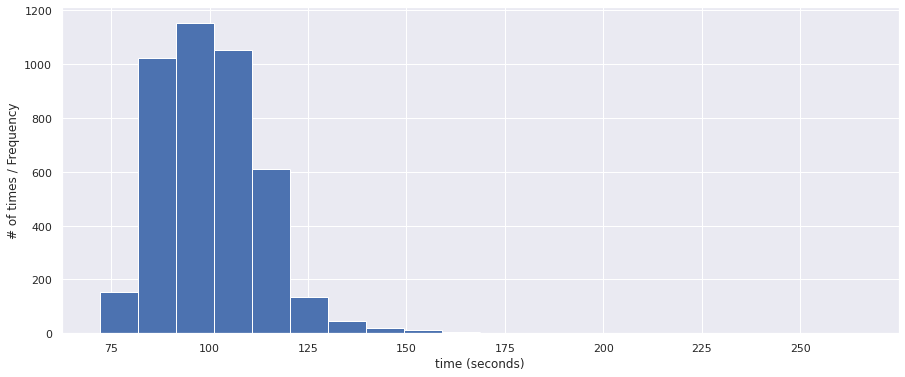

In [28]:
plt.figure(figsize=(15,6))
plt.hist(y,bins=20)
plt.ylabel('# of times / Frequency')
plt.xlabel('time (seconds)');

* Target variable distribution is normal.


* Data is pretty much centered around mean which is close to 100.


* There are a few outliers on right side.

### Checking whether things are changing over time

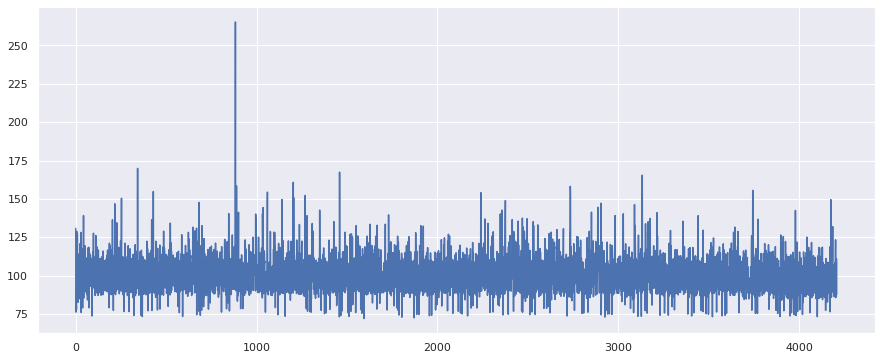

In [29]:
plt.figure(figsize=(15,6))
plt.plot(y);

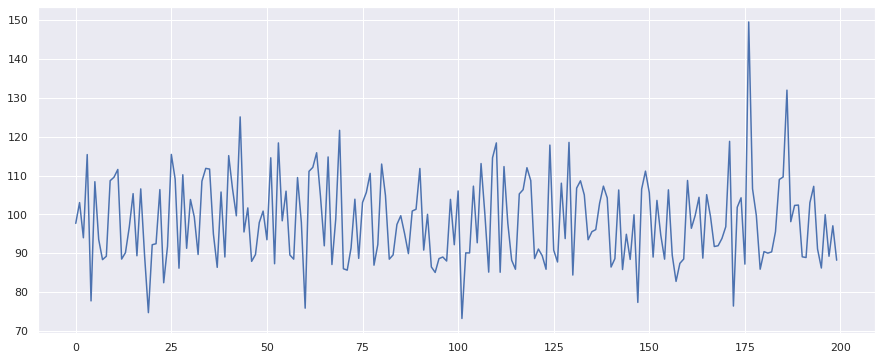

In [30]:
plt.figure(figsize=(15,6))
plt.plot(y[4000:4200]);

This series is not displaying seasonality, cyclicity or trend so this is not a time series.

### Perform feature analysis

## Markdown

### Esc + m - Markdown

### Esc + a - Adds new code block

In [31]:
cols = [c for c in df.columns if 'X' in c]

print(f'Number of Independent Variables: {len(cols)}')

print('Feature Types:')

df[cols].dtypes.value_counts()

Number of Independent Variables: 376
Feature Types:


int64     368
object      8
dtype: int64

### Find cardinality of columns

In [32]:
counts = [[],[],[]]

for c in cols:
    typ = df[c].dtype
    
    uniq = len(np.unique(df[c]))
    
    if uniq==1: counts[0].append(c)
    elif uniq==2 and typ==np.int64: counts[1].append(c)
    else: counts[2].append(c)
        
print(f' Constant Features:\n {counts[0]} \n\n Binary Features:\n {counts[1]} \n\n Categorical Features:\n {counts[2]}')

 Constant Features:
 ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'] 

 Binary Features:
 ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X13

## model with XGBoost

In [33]:
dft = pd.read_csv('test.csv')

features = list(set(df.columns)-set(['ID','y']))

X_train = df[features]
y_train = df['y'].values

X_test = dft[features]
id_test = df['ID'].values
count =0
for col in features:
    cardinality = len(np.unique(X_train[col]))
    
    # Dropping the contant columns
    if cardinality==1:
        X_train.drop(col,axis=1)
        X_test.drop(col,axis=1)
    
    # Label Encoding using ord
    if cardinality>2:
        count +=1
        mapper = lambda x: sum(ord(digit) for digit in x)
        print(mapper)
        X_train[col] = X_train[col].apply(mapper)
        X_test[col] = X_test[col].apply(mapper)


<function <lambda> at 0x7efe041c03b0>
<function <lambda> at 0x7efe6c1a5050>
<function <lambda> at 0x7efe6c196320>
<function <lambda> at 0x7efe2773fef0>
<function <lambda> at 0x7efe6c1a5050>
<function <lambda> at 0x7efe041c03b0>


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<function <lambda> at 0x7efe6c196320>
<function <lambda> at 0x7efe2773fef0>


In [34]:
ord('z')+ord('a')

219

In [35]:
df[counts[2]].head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [36]:
X_train[counts[2]].head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,107,118,213,97,100,117,106,111
1,107,116,215,101,100,121,108,111
2,219,119,110,99,100,120,106,120
3,219,116,110,102,100,120,108,101
4,219,118,110,102,100,104,100,110


In [37]:
X_train.shape

(4209, 376)

In [38]:
y_train.shape

(4209,)

### Modeling

In [39]:
import xgboost as xgb

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

d_train = xgb.DMatrix(X_train,label=y_train)
d_valid = xgb.DMatrix(X_valid,label=y_valid)
d_test = xgb.DMatrix(X_test)

params = {}

params['Objective'] = 'reg:linear'

params['eta'] = 0.02

params['max_depth'] = 4

def xgb_r2score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

watchlist = [(d_train,'Train'),(d_valid,'Validation')]

clf = xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,
                feval=xgb_r2score,maximize=True,verbose_eval=10)

[16:10:22] WARNING: /workspace/src/learner.cc:328: 
Parameters: { Objective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Train-rmse:98.98857	Validation-rmse:98.87984	Train-r2:-59.48709	Validation-r2:-61.81546
Multiple eval metrics have been passed: 'Validation-r2' will be used for early stopping.

Will train until Validation-r2 hasn't improved in 50 rounds.
[10]	Train-rmse:81.05273	Validation-rmse:80.98148	Train-r2:-39.55346	Validation-r2:-41.13300
[20]	Train-rmse:66.42595	Validation-rmse:66.38055	Train-r2:-26.23755	Validation-r2:-27.30953
[30]	Train-rmse:54.51055	Validation-rmse:54.48060	Train-r2:-17.34230	Validation-r2:-18.06930
[40]	Train-rmse:44.81946	Validation-rmse:44.79546	Train-r2:-11.40012	Validation-r2:-11.89197
[50]	Train-rmse:36.95561	Validation-rmse:36.9296

### Predictions

In [40]:
p_test = clf.predict(d_test)

pred = pd.DataFrame()

pred['ID'] = id_test
pred['y'] = p_test

In [41]:
pred.head(10)

,ID,y
0,0,88.408150
1,6,104.081802
2,7,88.808777
3,9,76.727913
4,13,111.108551
5,18,92.783699
6,24,111.006866
7,25,93.965324
8,27,115.931114
9,30,94.455727


In [42]:
X_train.shape

(3367, 376)

In [43]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=3)
pca2_results = pca2.fit_transform(X_train)

In [44]:
pca2_results

array([[-29.15308913, -20.60386801,  65.85338763],
       [-28.00954557, -20.21192432,  63.55270252],
       [ -7.59692216,  89.64302748,  -5.61374983],
       ...,
       [-32.23077735,   0.8229953 , -19.9959347 ],
       [-32.3866925 ,  -4.51574109, -15.77640483],
       [ 31.42206527, -58.63257721,  46.55098006]])

# Great Job!